# Daily Energy Pattern Analysis Using Wearable Tech



**Project Goal:**

* **Predict** individual energy levels (1-10) using Apple Watch and Fitbit data.
* **Analyze** daily activity metrics (heart rate, steps, etc.) with machine learning models (MLP, DT, RF, GBM, SVM).
* **Uncover** the impact of physical activity on energy fluctuations and well-being.

**Data Collection & Understanding:**

* **Participants:** 15 (9 females, 6 males)
* **Devices:** Apple Watch, Fitbit
* **Data:** Heart rate, steps, distance, calories, activity type (lying, sitting, walking, running)
* **Volume:** 3,656 mins (Apple Watch), 2,608 mins (Fitbit)
* **Protocol:** Daily 15-min sessions (5 mins treadmill, 5 mins rest)


**Business Potential:**

* **Personalized** virtual fitness coaching, nutrition tracking, mental health monitoring.
* **Improved** sleep quality, medication adherence, elderly care.
* **Innovative** corporate wellness programs, chronic disease management, pregnancy wellness, posture correction.

**Future Directions:**

* **Expand** dataset (more participants, activities).
* **Incorporate** sleep and stress data.
* **Explore** advanced machine learning techniques.
* **Develop** user-friendly applications.


In [ ]:
# The link to download is here "https://drive.google.com/file/d/1-4UH-JNJ4aYYZaKl-5p71Uy7Lm4bk3mB/view?usp=share_link"
# download and save it to a folder with the path "%cd /content/drive/MyDrive/602/3 in your drive."

# Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/602/3

/content/drive/MyDrive/602/3



# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [ ]:
file_path = 'apple_watch_data.csv'
df = pd.read_csv(file_path)

# Understanding Data

In [ ]:
df.head(5)

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.53130238,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.45339028,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.54082508,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.62825988,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.71569468,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [ ]:
# Display the first few rows to understand its structure
print("Dataset Head:")
print(df.head())

# Print summary information about the dataset, including data types
print("\nDataset Info:")
print(df.info())

# Print basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values initially
print("\nMissing Values Initially:")
print(df.isnull().sum())

Dataset Head:
   Unnamed: 0  X1  age  gender  height  weight      steps    hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.53130238   
1           2   2   20       1   168.0    65.4  11.475325  78.45339028   
2           3   3   20       1   168.0    65.4  12.179221  78.54082508   
3           4   4   20       1   168.0    65.4  12.883117  78.62825988   
4           5   5   20       1   168.0    65.4  13.587013  78.71569468   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0

# Cleaning Missing Values

In [ ]:
# Correcting column names with typos
df = df.rename(columns={
    'hear_rate': 'heart_rate',  # Corrected from 'hear_rate' to 'heart_rate'
    'entropy_setps': 'entropy_steps'  # Corrected from 'entropy_setps' to 'entropy_steps'
})

# Print the corrected column names to confirm changes
print(df.columns)

Index(['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps',
       'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_steps',
       'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen',
       'sd_norm_heart', 'steps_times_distance', 'device', 'activity'],
      dtype='object')


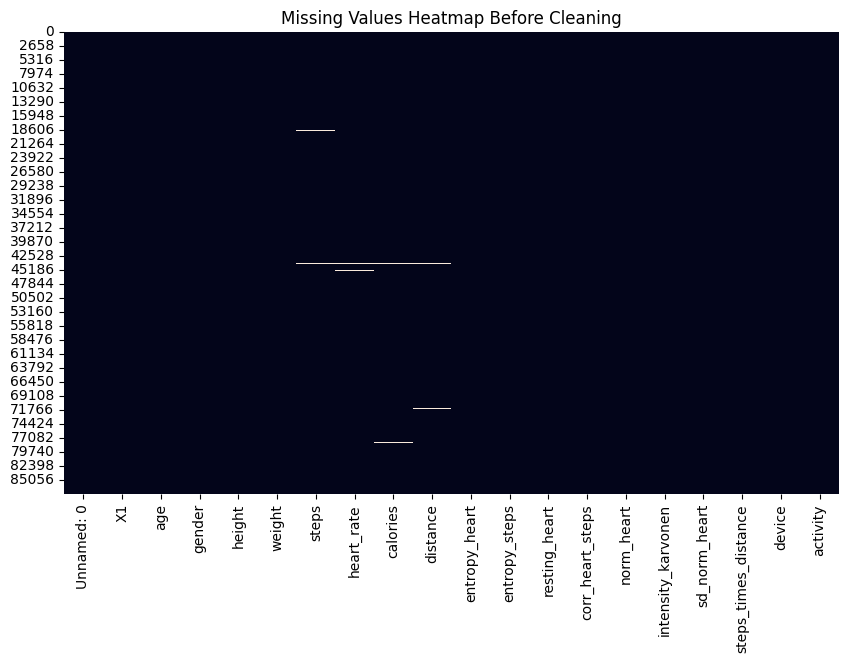

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap Before Cleaning')
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# Handling Random Missing Values using KNN Imputer for specified columns
knn_imputer = KNNImputer(n_neighbors=5)
df[['steps', 'calories', 'distance']] = knn_imputer.fit_transform(df[['steps', 'calories', 'distance']])

# For sequential missing values in 'hear_rate', use forward fill as a placeholder for continuous device failure
df['heart_rate'] = df['heart_rate'].fillna(method='ffill')

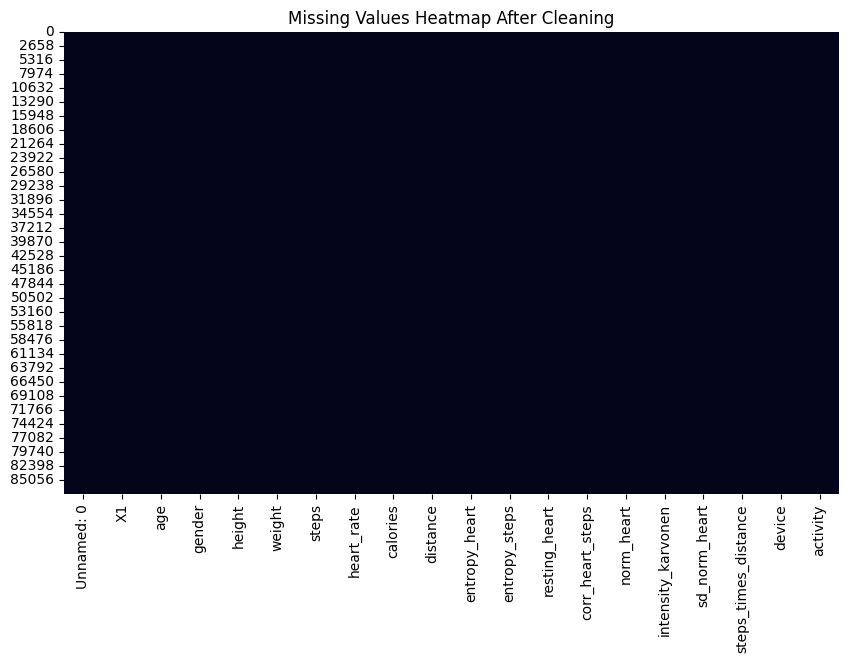

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap After Cleaning')
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
# Final check for missing values after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Unnamed: 0              0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
heart_rate              0
calories                0
distance                0
entropy_heart           0
entropy_steps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64


## Handling Outliers, Invalid Entries and Correcting Biologically Implausible Values

In [ ]:
# Convert 'hear_rate' to numeric and drop non-numeric values temporarily for scaling
df['heart_rate'] = pd.to_numeric(df['heart_rate'], errors='coerce')
df.dropna(subset=['heart_rate', 'steps', 'calories', 'distance'], inplace=True)

scaler = RobustScaler()
scaled_columns = ['heart_rate', 'steps', 'calories', 'distance']
df_scaled = scaler.fit_transform(df[scaled_columns])
df_scaled = pd.DataFrame(df_scaled, columns=scaled_columns)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05)
outliers = iso_forest.fit_predict(df_scaled)
df['outlier'] = outliers

# Remove outliers
df_cleaned = df[df['outlier'] != -1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


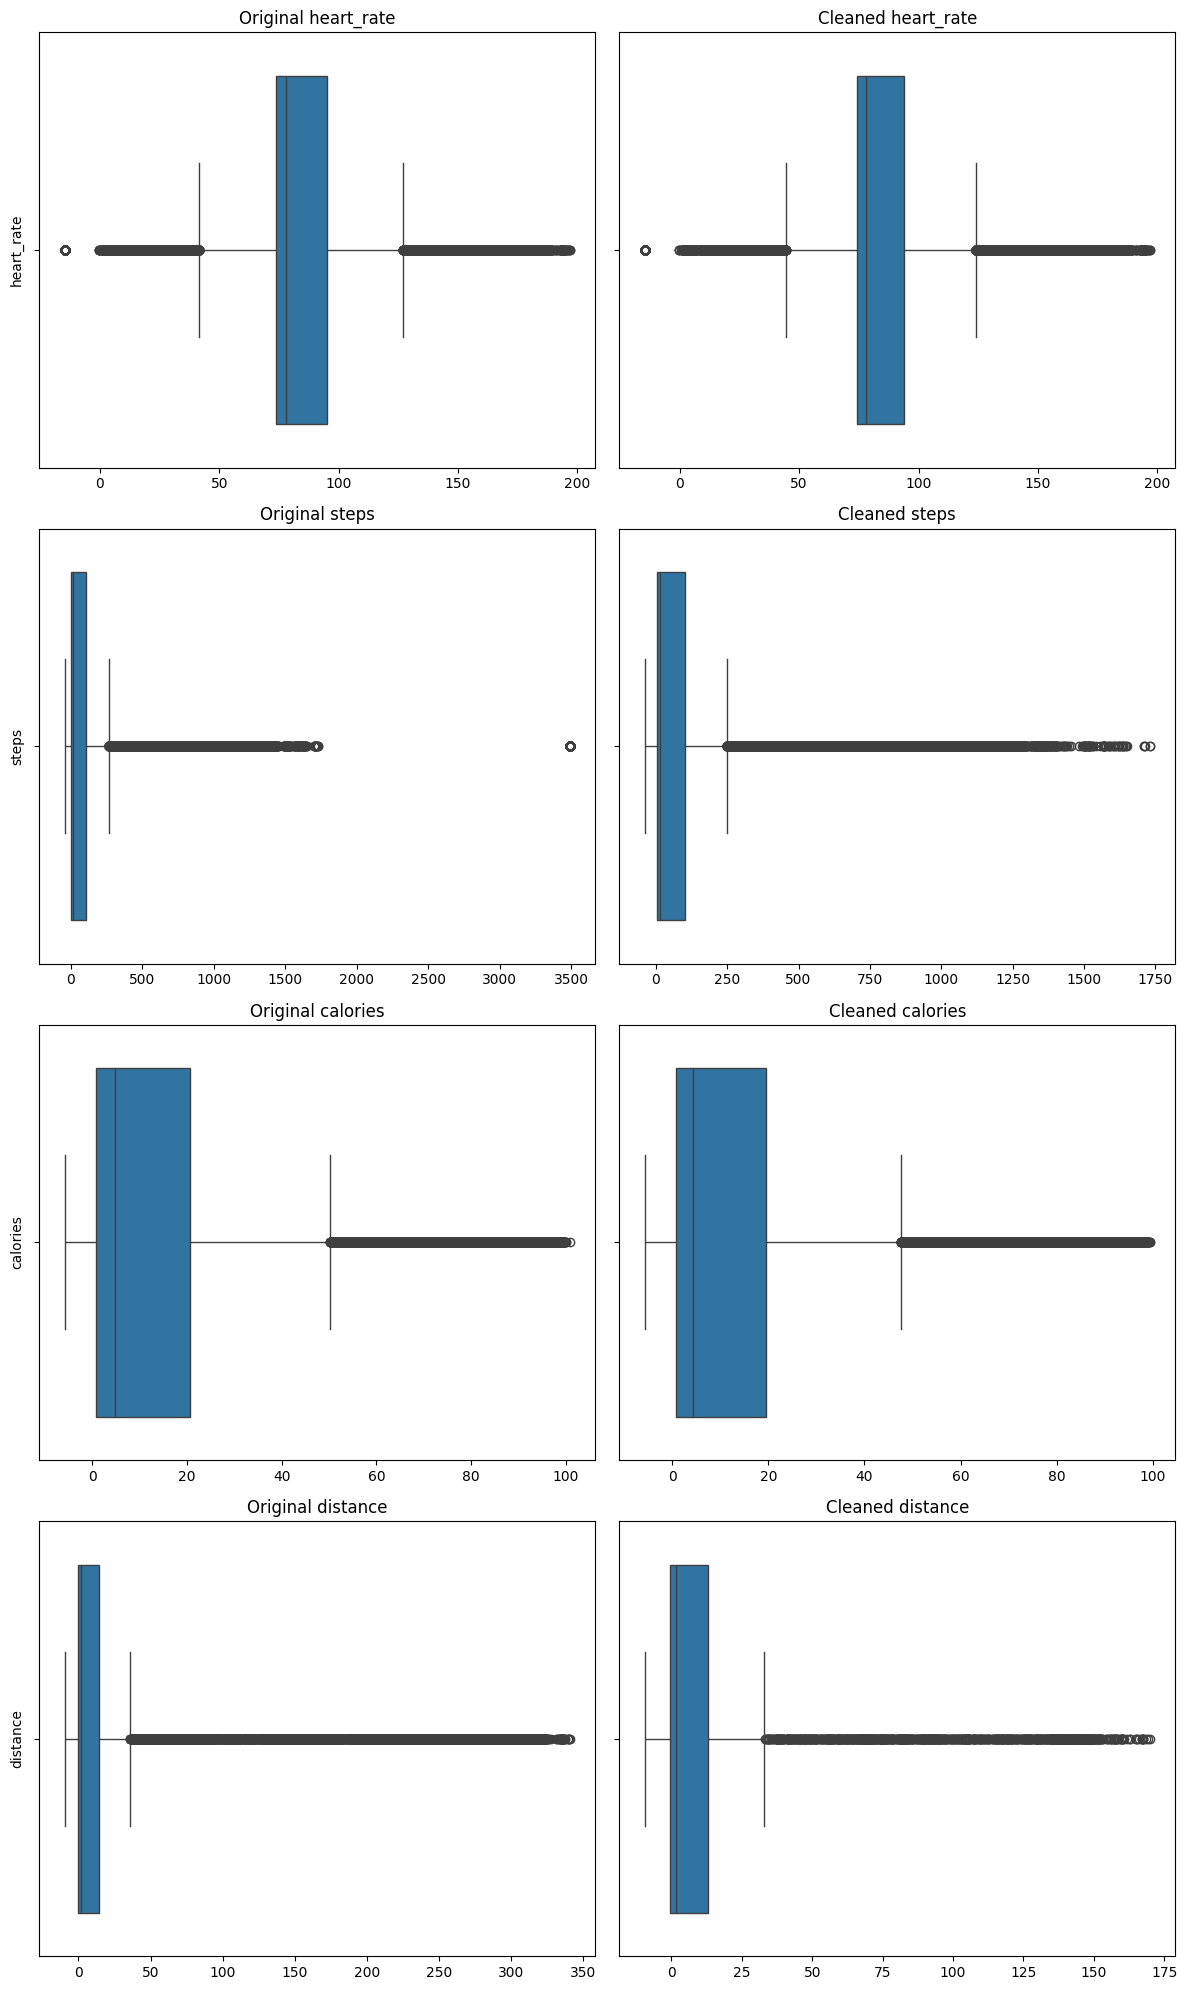

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 20))
axes = axes.flatten()

for i, col in enumerate(scaled_columns):
    # Plot before cleaning
    sns.boxplot(x=df[col], ax=axes[2*i])
    axes[2*i].set_title(f'Original {col}')
    axes[2*i].set_xlabel('')
    axes[2*i].set_ylabel(col)

    # Plot after cleaning
    sns.boxplot(x=df_cleaned[col], ax=axes[2*i + 1])
    axes[2*i + 1].set_title(f'Cleaned {col}')
    axes[2*i + 1].set_xlabel('')
    axes[2*i + 1].set_ylabel('')

plt.tight_layout()
plt.show()


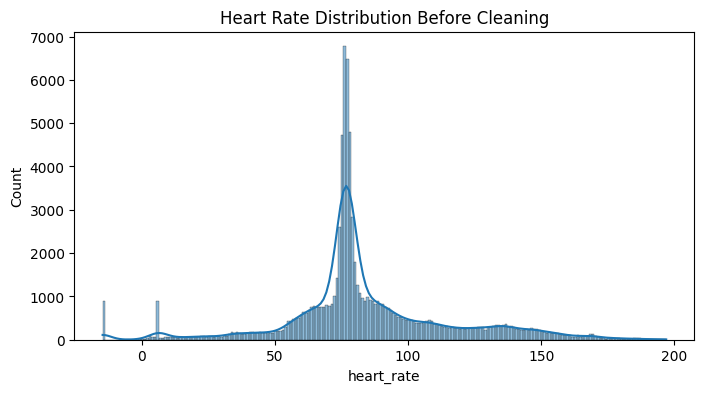

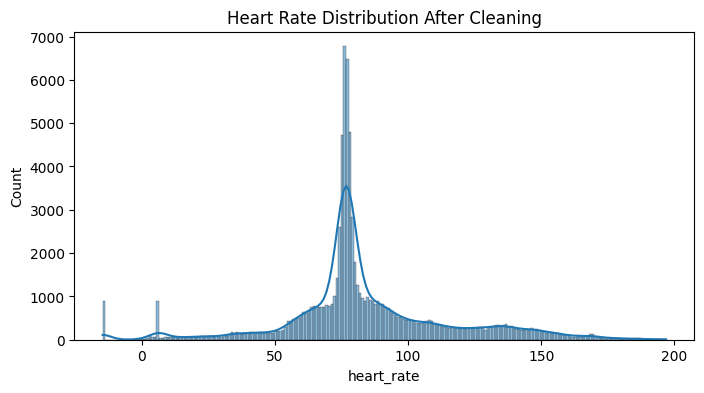

In [ ]:
# Visualize 'heart_rate' before cleaning
plt.figure(figsize=(8, 4))
plt.title('Heart Rate Distribution Before Cleaning')
sns.histplot(df['heart_rate'].dropna(), kde=True)
plt.show()

# Use Linear Regression to predict and impute invalid entries
if df['heart_rate'].isnull().any():
    model = LinearRegression()
    train_df = df.dropna(subset=['heart_rate'])
    X_train = train_df[['age', 'weight', 'steps']]
    y_train = train_df['heart_rate']
    model.fit(X_train, y_train)

    # Predict missing 'heart_rate' values
    missing_values = df[df['heart_rate'].isnull()]
    X_missing = missing_values[['age', 'weight', 'steps']]
    if not X_missing.empty:
        predicted_values = model.predict(X_missing)
        df.loc[df['heart_rate'].isnull(), 'heart_rate'] = predicted_values

# Visualize 'heart_rate' after cleaning
plt.figure(figsize=(8, 4))
plt.title('Heart Rate Distribution After Cleaning')
sns.histplot(df['heart_rate'], kde=True)
plt.show()

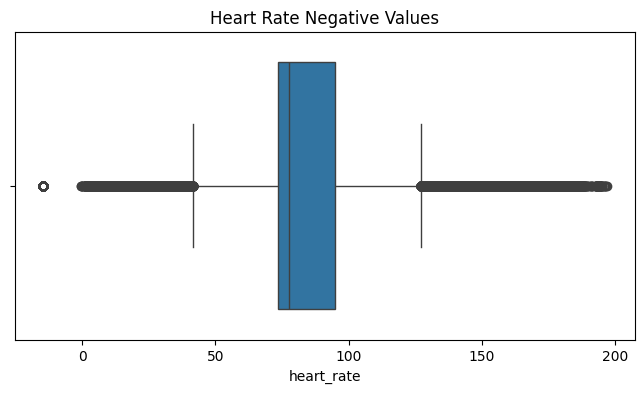

In [ ]:
plt.figure(figsize=(8, 4))
plt.title('Heart Rate Negative Values')
sns.boxplot(x=df['heart_rate'])
plt.show()

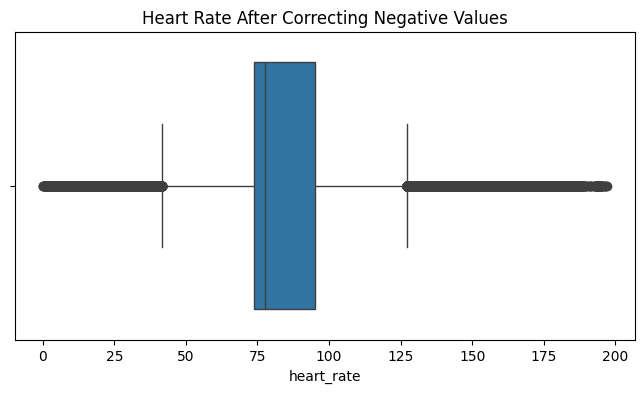

In [ ]:
# Replace negative values with the absolute value
df['heart_rate'] = df['heart_rate'].apply(lambda x: abs(x) if x < 0 else x)

# Visualize 'heart_rate' after correcting negative values
plt.figure(figsize=(8, 4))
plt.title('Heart Rate After Correcting Negative Values')
sns.boxplot(x=df['heart_rate'])
plt.show()

## Adjust Activity Labels

In [ ]:
import numpy as np
import time

# Store original activities before any transformation
original_activities = df['activity'].copy()

# Replace all instances of "Self Pace Walk" with "Walking"
df['activity'] = df['activity'].replace('Self Pace walk', 'Walking')

def map_activities(activity):
    if activity == "Stnding":
        return np.random.choice(["Lying", "Sitting", "Walking"])
    return activity

# Apply random assignments for "Stnding"
df['activity'] = df['activity'].apply(map_activities)  # Apply mapping function

# Frequencies before any changes are made
original_freq = original_activities.value_counts()
corrected_freq = df['activity'].value_counts()

Time taken for mapping: 0.0868 seconds


<ipython-input-17-9893019b298b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=original_freq.index, y=original_freq.values, palette="viridis")
<ipython-input-17-9893019b298b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corrected_freq.index, y=corrected_freq.values, palette="viridis")


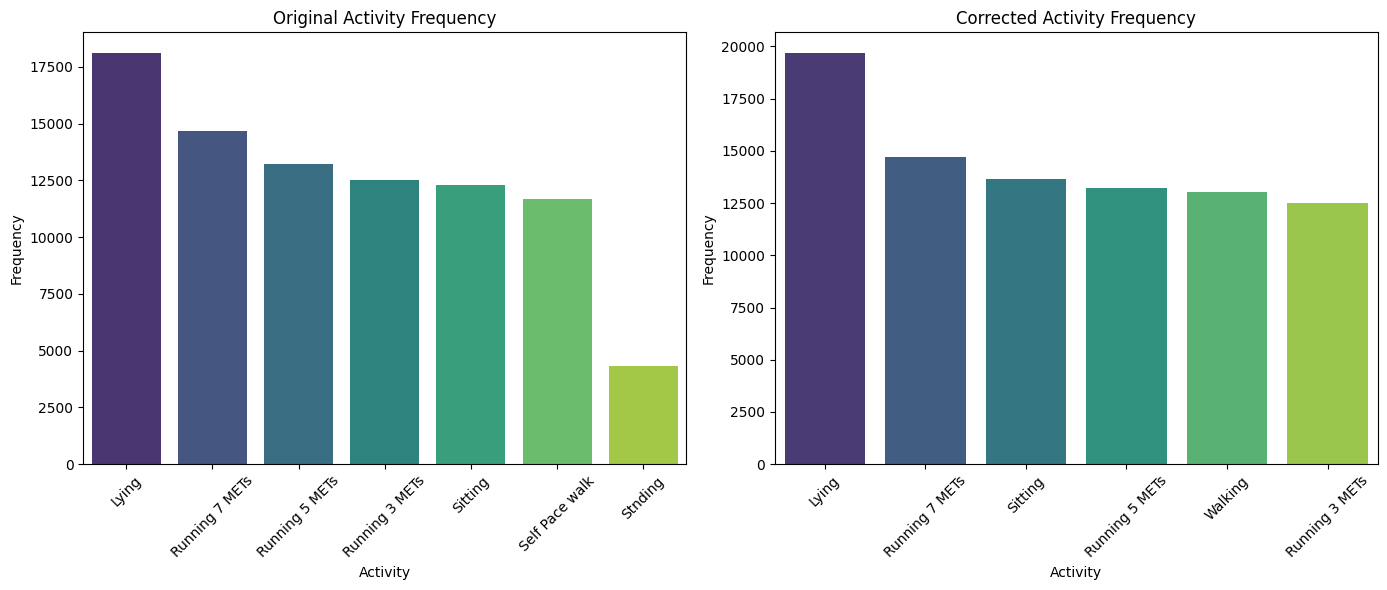

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=original_freq.index, y=original_freq.values, palette="viridis")
plt.title('Original Activity Frequency')
plt.ylabel('Frequency')
plt.xlabel('Activity')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=corrected_freq.index, y=corrected_freq.values, palette="viridis")
plt.title('Corrected Activity Frequency')
plt.ylabel('Frequency')
plt.xlabel('Activity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Saving Clean Data

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

print(f"Dataset saved as 'cleaned_data.csv'")

Dataset saved as 'cleaned_data.csv'


In [ ]:
# Import necessary libraries
import pandas as pd

# Load your dataset from a CSV file (adjust the file path as needed)
file_path = 'cleaned_data.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print("Dataset Head:")
print(dataset.head())

# Print summary information about the dataset, including data types
print("\nDataset Info:")
print(dataset.info())

# Print basic descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(dataset.describe())

# Check for missing values
print("\nMissing Values:")
print(dataset.isnull().sum())

Dataset Head:
   Unnamed: 0  X1  age  gender  height  weight      steps  heart_rate  \
0           1   1   20       1   168.0    65.4  10.771429   78.531302   
1           2   2   20       1   168.0    65.4  11.475325   78.453390   
2           3   3   20       1   168.0    65.4  12.179221   78.540825   
3           4   4   20       1   168.0    65.4  12.883117   78.628260   
4           5   5   20       1   168.0    65.4  13.587013   78.715695   

    calories  distance  ...  entropy_steps  resting_heart  corr_heart_steps  \
0   0.344533  0.008327  ...       6.116349           59.0          1.000000   
1   3.287625  0.008896  ...       6.116349           59.0          1.000000   
2   9.484000  0.009466  ...       6.116349           59.0          1.000000   
3  10.154556  0.010035  ...       6.116349           59.0          1.000000   
4  10.825111  0.010605  ...       6.116349           59.0          0.982816   

   norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  

In [ ]:
df.head(5)

,Unnamed: 0,X1,age,gender,height,weight,steps,heart_rate,calories,distance,...,entropy_steps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,outlier
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,...,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying,1
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,...,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying,1
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,...,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying,1
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,...,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying,1
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,...,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying,1


# Column Energy Addition

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
file_path = 'cleaned_data.csv'
dataset = pd.read_csv(file_path)

In [ ]:
# Basic exploration
print("Dataset Head:")
print(dataset.head())
print("\nDataset Info:")
print(dataset.info())
print("\nDescriptive Statistics:")
print(dataset.describe())
print("\nMissing Values:")
print(dataset.isnull().sum())


Dataset Head:
   Unnamed: 0  X1  age  gender  height  weight      steps  heart_rate  \
0           1   1   20       1   168.0    65.4  10.771429   78.531302   
1           2   2   20       1   168.0    65.4  11.475325   78.453390   
2           3   3   20       1   168.0    65.4  12.179221   78.540825   
3           4   4   20       1   168.0    65.4  12.883117   78.628260   
4           5   5   20       1   168.0    65.4  13.587013   78.715695   

    calories  distance  ...  entropy_steps  resting_heart  corr_heart_steps  \
0   0.344533  0.008327  ...       6.116349           59.0          1.000000   
1   3.287625  0.008896  ...       6.116349           59.0          1.000000   
2   9.484000  0.009466  ...       6.116349           59.0          1.000000   
3  10.154556  0.010035  ...       6.116349           59.0          1.000000   
4  10.825111  0.010605  ...       6.116349           59.0          0.982816   

   norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  

In [ ]:
# Define weights for energy calculation
weights = {
    'heart_rate': 0.25,
    'steps': 0.25,
    'calories': 0.25,
    'distance': 0.25
}

# Normalize features and calculate scores
for column in weights.keys():
    min_val = dataset[column].min()
    max_val = dataset[column].max()
    dataset[column + '_norm'] = (dataset[column] - min_val) / (max_val - min_val)

dataset['energy_score'] = sum(dataset[col + '_norm'] * weight for col, weight in weights.items())
dataset['energy_level'] = dataset['energy_score'].apply(lambda x: 1 + 9 * x)


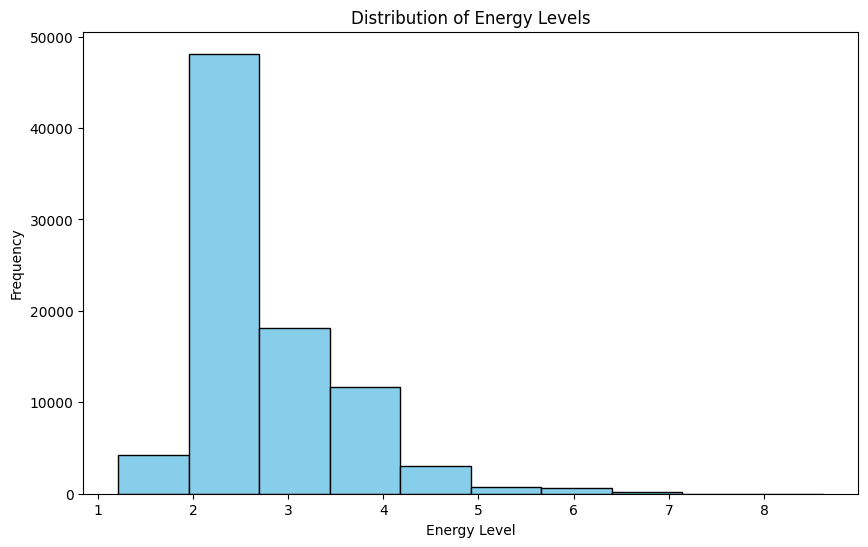

In [ ]:
# Save updated data
new_file_path = 'energy_data.csv'
dataset.to_csv(new_file_path, index=False)

# Histogram of energy levels
plt.figure(figsize=(10, 6))
dataset['energy_level'].plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Energy Levels')
plt.xlabel('Energy Level')
plt.ylabel('Frequency')
plt.show()

The histogram shows the frequency distribution of energy levels, with the highest frequency at level 2 and decreasing frequency as energy levels increase.

# PCA

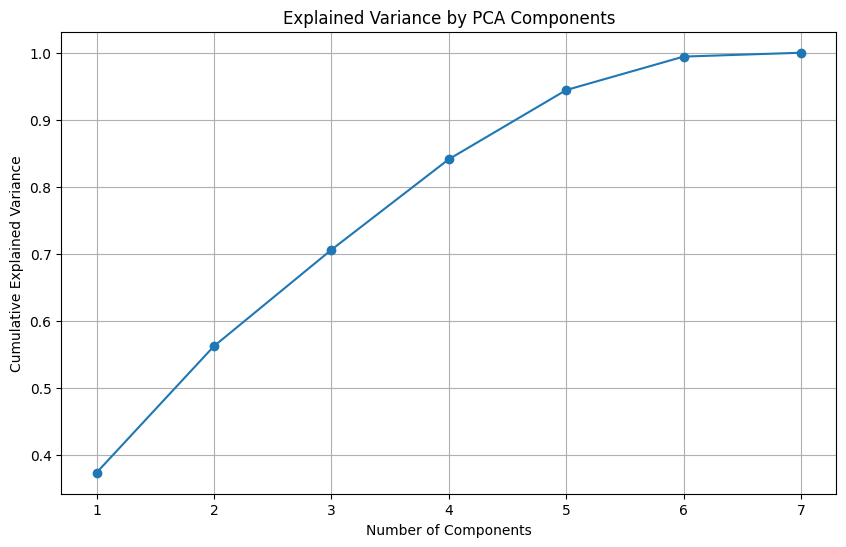

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('energy_data.csv')

features = ['heart_rate', 'steps', 'calories', 'distance', 'entropy_heart', 'norm_heart', 'intensity_karvonen']  # extended feature set
scaler = StandardScaler()
standardized_features = scaler.fit_transform(dataset[features])

# PCA analysis
pca = PCA()
pca.fit(standardized_features)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
components_range = np.arange(1, len(pca.explained_variance_ratio_) + 1)
plt.plot(components_range, np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks(components_range)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [ ]:
# Select first 4 principal components based on the plot
n_components = 4
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_features)

# Prepare final DataFrame for further analysis
column_names = [f'Principal Component {i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=principal_components, columns=column_names)
final_df = pd.concat([pca_df, dataset[['energy_level']]], axis=1)

In [ ]:
print("Explained variance by component:", pca.explained_variance_ratio_)

Explained variance by component: [0.37381573 0.18863869 0.14369342 0.13502903]


In [ ]:
# Save PCA results
pca_file_path = 'pca_energy_data.csv'
final_df.to_csv(pca_file_path, index=False)
print("PCA results saved to:", pca_file_path)

PCA results saved to: pca_energy_data.csv


# Outlier Detection and Analysis

## Cluster Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

# Load PCA results
pca_file_path = 'pca_energy_data.csv'
cleaned_df = pd.read_csv(pca_file_path)

data_np = np.ascontiguousarray(cleaned_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']].to_numpy(dtype=np.float32))

range_n_clusters = range(2, 11)  # Adjust upper limit if needed
silhouette_scores = []

for n_clusters in range_n_clusters:
    mb_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=100, n_init=10, max_no_improvement=10, verbose=0)
    cluster_labels = mb_kmeans.fit_predict(data_np)
    silhouette_avg = silhouette_score(data_np, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}.')

# Find optimal number of clusters
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f'The best number of clusters is {best_n_clusters}.')


For n_clusters = 2, the silhouette score is 0.5148462653160095.
For n_clusters = 3, the silhouette score is 0.5109730958938599.
For n_clusters = 4, the silhouette score is 0.4449295103549957.
For n_clusters = 5, the silhouette score is 0.22632332146167755.
For n_clusters = 6, the silhouette score is 0.412313848733902.
For n_clusters = 7, the silhouette score is 0.43095269799232483.
For n_clusters = 8, the silhouette score is 0.3934960663318634.
For n_clusters = 9, the silhouette score is 0.37575703859329224.
For n_clusters = 10, the silhouette score is 0.4012366831302643.
The best number of clusters is 2.


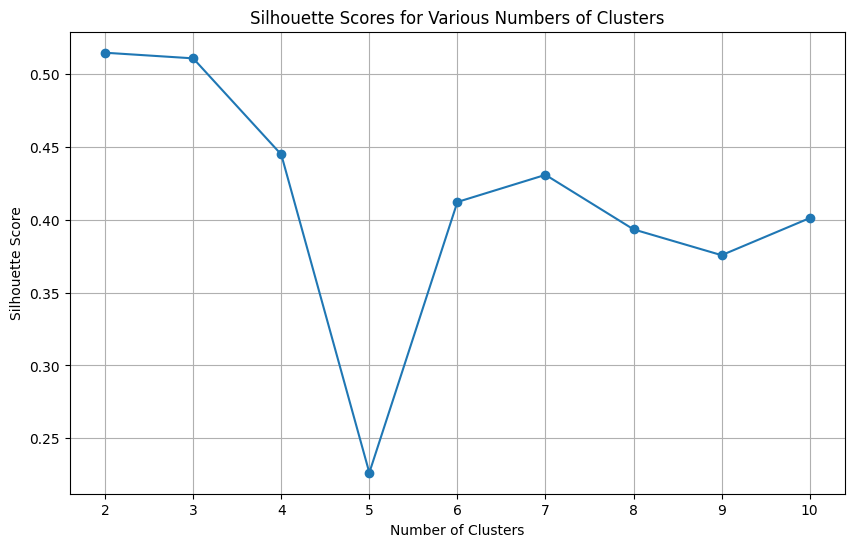

In [ ]:
# Plotting silhouette scores for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
file_path = 'pca_energy_data.csv'
final_df = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']])

# Fit KMeans clustering
kmeans = KMeans(n_clusters=2)
final_df['Cluster'] = kmeans.fit_predict(final_df_scaled)

print(final_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Principal Component 1  Principal Component 2  Principal Component 3  \
0               0.104064              -0.558734              -0.177901   
1               0.123629              -0.493013              -0.199355   
2               0.150449              -0.352544              -0.245285   
3               0.148700              -0.337445              -0.250035   
4               0.146951              -0.322347              -0.254785   

   Principal Component 4  energy_level  Cluster  
0              -0.442137      2.120466        0  
1              -0.424071      2.182087        0  
2              -0.388967      2.314198        0  
3              -0.384163      2.329789        0  
4              -0.379358      2.345379        0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5151680838266744


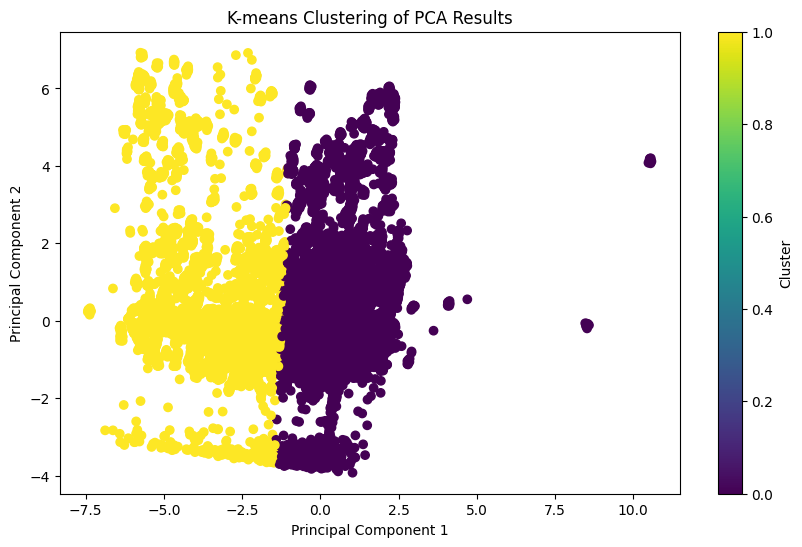

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your dataset
file_path = 'pca_energy_data.csv'
final_df = pd.read_csv(file_path)

# Cluster Analysis using K-means
kmeans = KMeans(n_clusters=2, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']])

# Calculate silhouette score for validation
silhouette_avg = silhouette_score(final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']], final_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Plotting only the first two PCA components for visualization purposes
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], c=final_df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of PCA Results')
plt.show()


A scatter plot showing the results of k-means clustering on two principal components, with two distinct clusters identified.

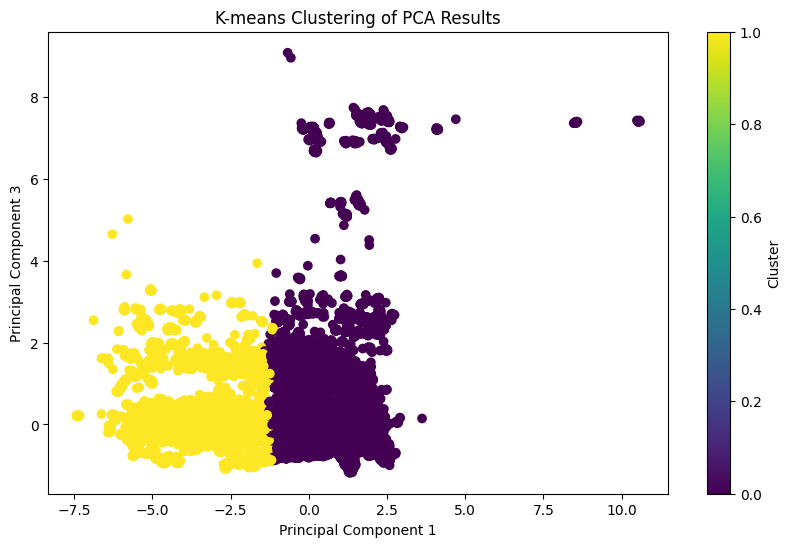

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 3'], c=final_df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.title('K-means Clustering of PCA Results')
plt.show()

Scatter plot showing the results of k-means clustering on two principal components, with two distinct clusters identified.

## Working on Outliers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = 'pca_energy_data.csv'
final_df = pd.read_csv(file_path)

# Standardize the data
scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']])

# Fit KMeans clustering
kmeans = KMeans(n_clusters=5)
final_df['Cluster'] = kmeans.fit_predict(final_df_scaled)

print(final_df.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Principal Component 1  Principal Component 2  Principal Component 3  \
0               0.104064              -0.558734              -0.177901   
1               0.123629              -0.493013              -0.199355   
2               0.150449              -0.352544              -0.245285   
3               0.148700              -0.337445              -0.250035   
4               0.146951              -0.322347              -0.254785   

   Principal Component 4  energy_level  Cluster  
0              -0.442137      2.120466        1  
1              -0.424071      2.182087        1  
2              -0.388967      2.314198        1  
3              -0.384163      2.329789        1  
4              -0.379358      2.345379        1  


In [ ]:
centroids = final_df.groupby('Cluster').mean()[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']]

def calculate_distance(row):
    centroid = centroids.loc[row['Cluster']]
    distance = np.sqrt((row['Principal Component 1'] - centroid['Principal Component 1'])**2 +
                       (row['Principal Component 2'] - centroid['Principal Component 2'])**2 +
                       (row['Principal Component 3'] - centroid['Principal Component 3'])**2 +
                       (row['Principal Component 4'] - centroid['Principal Component 4'])**2)
    return distance

final_df['distance_to_centroid'] = final_df.apply(calculate_distance, axis=1)

print(final_df.head())

   Principal Component 1  Principal Component 2  Principal Component 3  \
0               0.104064              -0.558734              -0.177901   
1               0.123629              -0.493013              -0.199355   
2               0.150449              -0.352544              -0.245285   
3               0.148700              -0.337445              -0.250035   
4               0.146951              -0.322347              -0.254785   

   Principal Component 4  energy_level  Cluster  distance_to_centroid  
0              -0.442137      2.120466        1              0.757575  
1              -0.424071      2.182087        1              0.700262  
2              -0.388967      2.314198        1              0.603596  
3              -0.384163      2.329789        1              0.597672  
4              -0.379358      2.345379        1              0.592157  


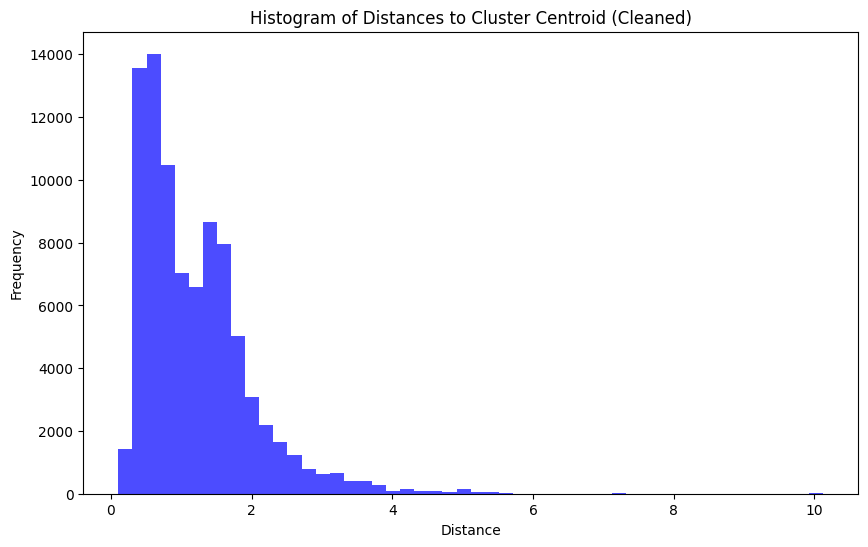

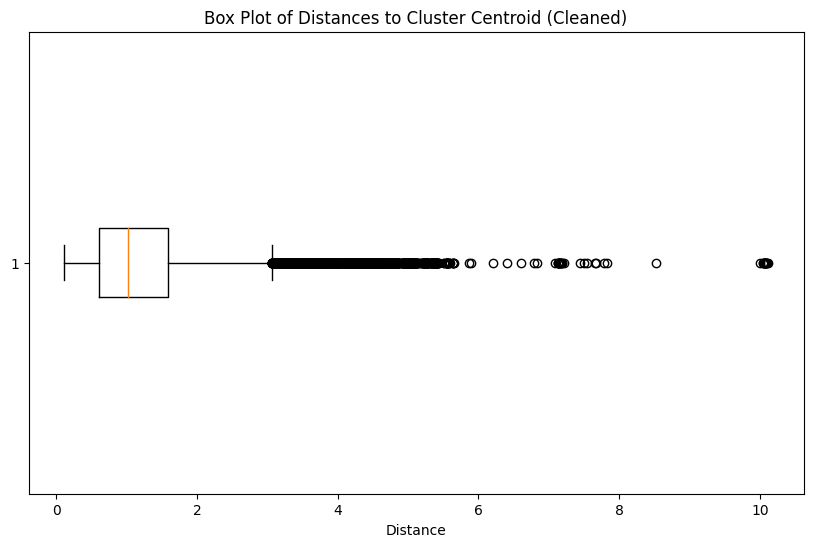

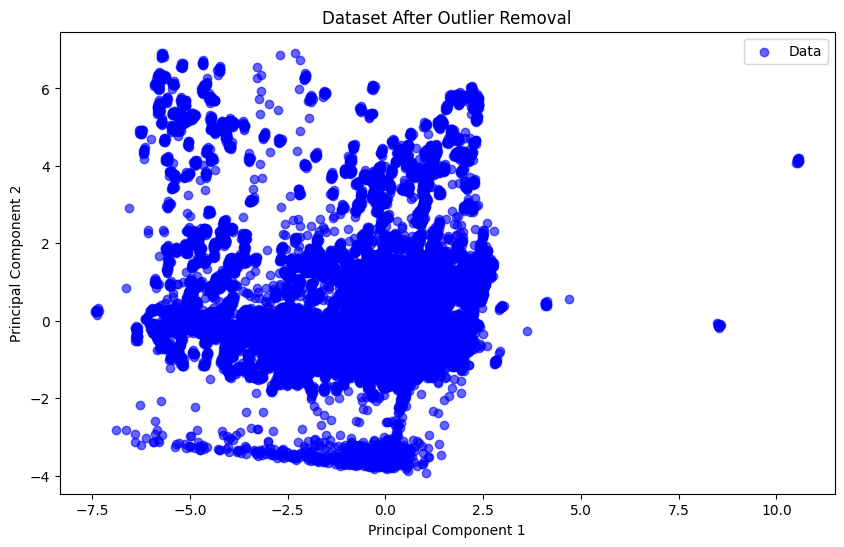

In [ ]:
# Histogram of distances for data
plt.figure(figsize=(10, 6))
plt.hist(final_df['distance_to_centroid'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Distances to Cluster Centroid (Cleaned)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of distances
plt.figure(figsize=(10, 6))
plt.boxplot(final_df['distance_to_centroid'], vert=False)
plt.title('Box Plot of Distances to Cluster Centroid (Cleaned)')
plt.xlabel('Distance')
plt.show()

# Scatter plot of Principal Components before outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], c='blue', label='Data', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dataset After Outlier Removal')
plt.legend()
plt.show()

In [ ]:
# A fixed threshold for outlier detection
threshold = 4.8
final_df['is_outlier'] = final_df['distance_to_centroid'] > threshold
cleaned_df = final_df[~final_df['is_outlier']]

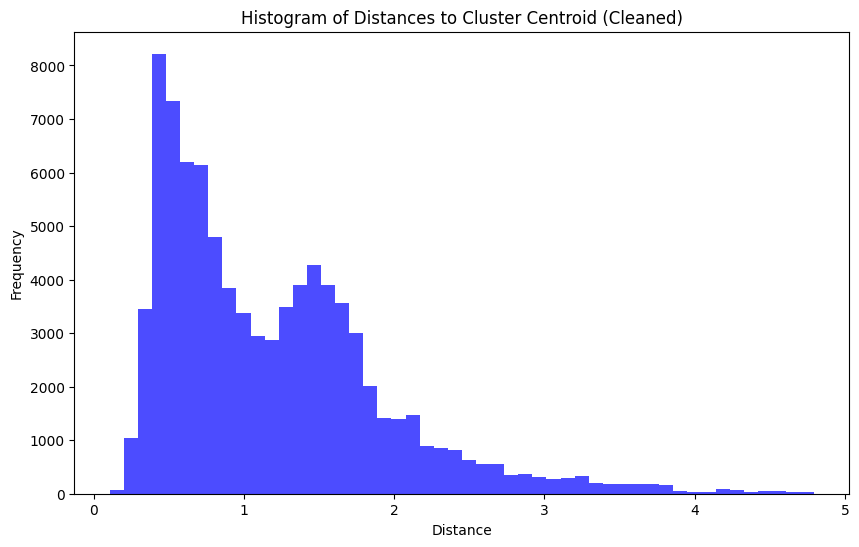

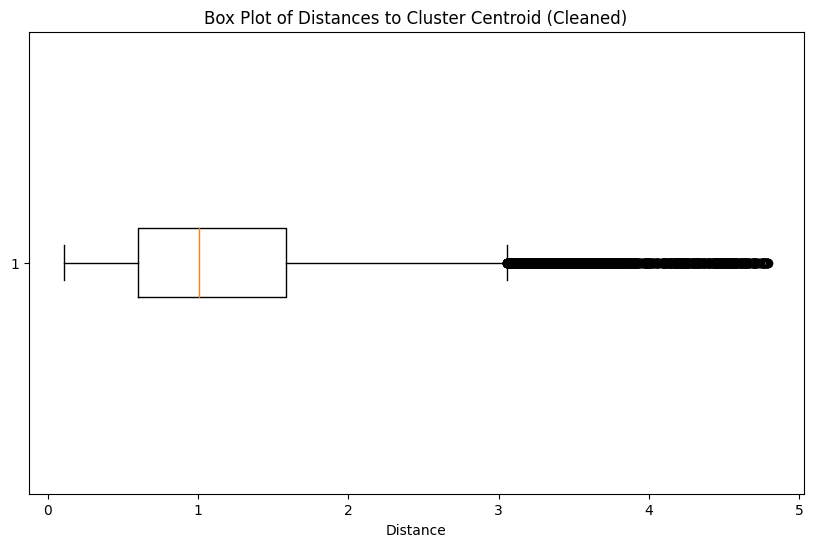

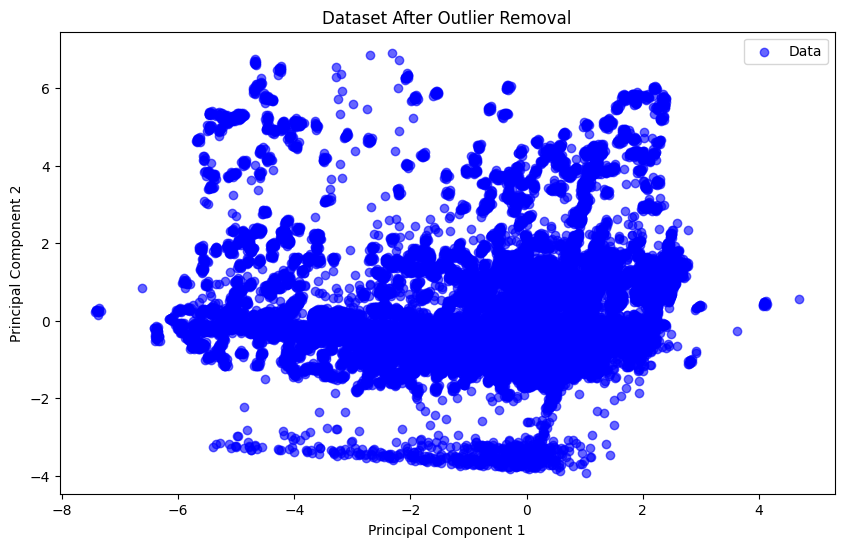

In [ ]:
# Histogram of distances for cleaned data
plt.figure(figsize=(10, 6))
plt.hist(cleaned_df['distance_to_centroid'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Distances to Cluster Centroid (Cleaned)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of distances
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['distance_to_centroid'], vert=False)
plt.title('Box Plot of Distances to Cluster Centroid (Cleaned)')
plt.xlabel('Distance')
plt.show()

# Scatter plot of Principal Components after outlier removal
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['Principal Component 1'], cleaned_df['Principal Component 2'], c='blue', label='Data', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dataset After Outlier Removal')
plt.legend()
plt.show()

In [ ]:
outlier = 'without_outliers.csv'
cleaned_df.to_csv(outlier, index=False)
print("Outlier results saved to:", outlier)

Outlier results saved to: without_outliers.csv


## Cluster Analysis after outliers gone

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5087998187062529


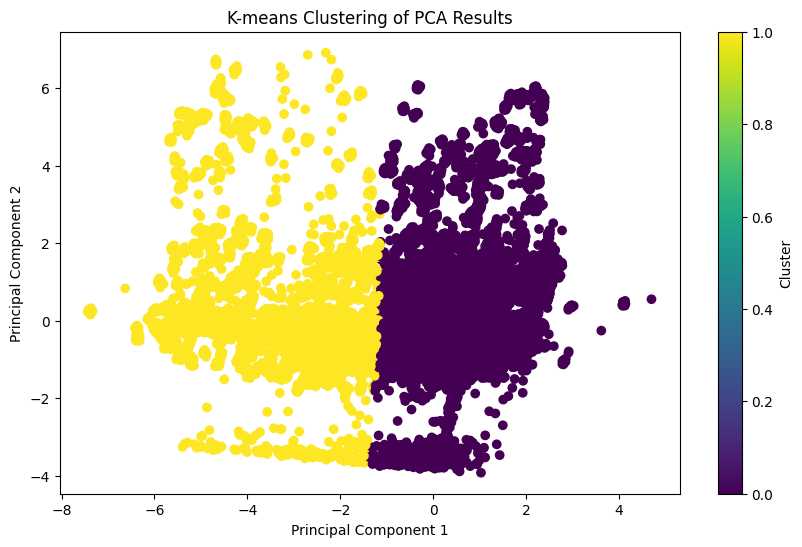

In [ ]:
file_path = 'without_outliers.csv'
final_df = pd.read_csv(file_path)

kmeans = KMeans(n_clusters=2, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']])

silhouette_avg = silhouette_score(final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']], final_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Principal Component 1'], final_df['Principal Component 2'], c=final_df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of PCA Results')
plt.show()

## Modeling with Cleaned Data

In [ ]:
file_path = 'without_outliers.csv'
final_df = pd.read_csv(file_path)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = final_df[['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']]
y = final_df['energy_level']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.04097587052154746
Mean Squared Error: 0.007984233153520441
R-squared: 0.9853642044292824


## Save Final Results

In [ ]:
final_df.to_csv('clustered_data.csv', index=False)
print("Clustering results saved to 'clustered_data.csv'")

Clustering results saved to 'clustered_data.csv'


# Model Selection

In [ ]:
# Load the clustered data
file_path = 'clustered_data.csv'
df = pd.read_csv(file_path)

# Define features and target
features = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3', 'Principal Component 4']
target = 'energy_level'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE': mse, 'R2': r2}

## Evaluate Models

In [ ]:
# Models to evaluate
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
}

In [ ]:
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"{name} - MAE: {results[name]['MAE']}, MSE: {results[name]['MSE']}, R2: {results[name]['R2']}")

Random Forest - MAE: 0.04097587052154746, MSE: 0.007984233153520441, R2: 0.9853642044292824
Gradient Boosting - MAE: 0.1178495708416083, MSE: 0.0335766655745973, R2: 0.9384510442208869
Neural Network - MAE: 0.07938744695901229, MSE: 0.016503996277753903, R2: 0.9697467357256988


In [ ]:
# Cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{name} - Cross-Validated R-squared: {cv_scores.mean()}")

Random Forest - Cross-Validated R-squared: 0.9848724077189287
Gradient Boosting - Cross-Validated R-squared: 0.9381775442173537
Neural Network - Cross-Validated R-squared: 0.9670953494880232


In [ ]:
# Save the results
results_df = pd.DataFrame(results).T
results_df.to_csv('model_evaluation_results.csv')
print("Model evaluation results saved to 'model_evaluation_results.csv'")

Model evaluation results saved to 'model_evaluation_results.csv'


## Trying extra Trees Regressor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you want to scale the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

def evaluate_model(model, X_train, X_test, y_train_scaled, y_test_scaled, scaler_y=None):
    model.fit(X_train, y_train_scaled)
    y_pred_scaled = model.predict(X_test)
    if scaler_y:
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    else:
        y_pred = y_pred_scaled
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

# Usage with Extra Trees Regressor
et_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
mae, mse, r2 = evaluate_model(et_model, X_train, X_test, y_train_scaled, y_test_scaled, scaler_y)
print(f"Extra Trees - MAE: {mae}, MSE: {mse}, R2: {r2}")

Extra Trees - MAE: 0.05203421584737347, MSE: 0.012476048956019425, R2: 0.9873910810069125


## Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

bg_model = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=10, random_state=42), n_estimators=10, random_state=42)
mae, mse, r2 = evaluate_model(bg_model, X_train, X_test, y_train, y_test)
print(f"Bagging Regressor - MAE: {mae}, MSE: {mse}, R2: {r2}")

# Cross-validation for Bagging Regressor
bg_cv_scores = cross_val_score(bg_model, X, y, cv=5, scoring='r2')
print(f"Bagging Regressor - Cross-Validated R-squared: {bg_cv_scores.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor - MAE: 0.0440041183176671, MSE: 0.008691279846394026, R2: 0.9840681261889711


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor - Cross-Validated R-squared: 0.9839223957610054


# Model Evaluation

In [ ]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

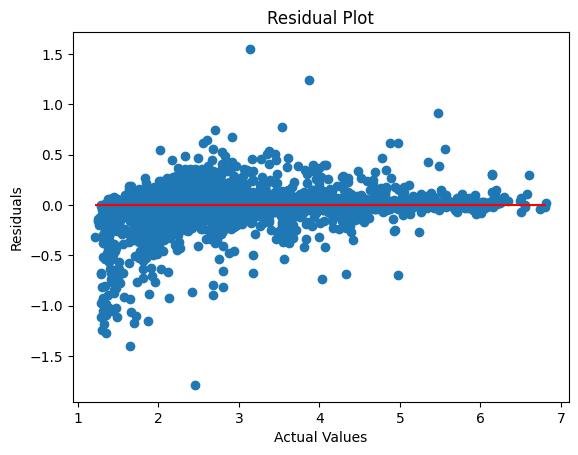

In [ ]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='red')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Residual plot demonstrating a relatively even distribution of residuals around zero across the range of actual values, suggesting a good fit for a linear regression model.

# Conclusion

**Key Takeaways and Future Directions:**

* **Successful prediction of individual energy levels:** Leveraging wearable data and machine learning models (especially Random Forest), we achieved accurate predictions of energy levels (1-10).
* **Deepened understanding of energy dynamics:** This research unveils the intricate link between physical activity and energy fluctuations, informing personalized wellness strategies.
* **Real-world applications:** The insights gained pave the way for innovative solutions in:
    * **Personalized virtual fitness coaching:** Tailored workouts based on real-time energy levels.
    * **Nutrition tracking and analysis:** Dynamic meal plans aligned with energy peaks and troughs.
    * **Mental health monitoring:** Proactive interventions based on detected energy dips.
    * **Sleep quality improvement:** Personalized recommendations for optimal sleep patterns.
    * **Medication adherence:** Timely reminders and adjustments based on energy fluctuations.
    * **Elderly care monitoring:** Proactive health management through energy pattern analysis.
    * **Corporate wellness programs:** Engaging employees with personalized energy optimization strategies.
    * **Chronic disease management:** Tailored care plans adapting to individual energy patterns.
    * **Pregnancy wellness:** Supporting healthy pregnancies with personalized energy management.
    * **Posture correction:** Real-time alerts and corrective exercises for improved posture.
* **Future research:** Expanding the dataset, incorporating additional features (sleep, stress), exploring advanced machine learning techniques, and developing user-friendly applications are key areas for future investigation.
